# First bar & pivot points & day High Low - Analytics

### Import Library

In [13]:
import numpy as np
import pandas as pd
import numpy as np
import pandas_ta as ta
import seaborn as sns
import math

import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 120
plt.rcParams['figure.constrained_layout.use'] = True
import warnings
warnings.filterwarnings('ignore')

### Load Price Data

In [14]:
import os
from pathlib import Path
notebook_path = os.getcwd()
algo_dir = Path(notebook_path).parent.parent
csv_file = str(algo_dir) + '/vn-stock-data/VN30ps/VN30F1M_5minutes.csv'
is_file = os.path.isfile(csv_file)
if is_file:
    dataset = pd.read_csv(csv_file, index_col='Date', parse_dates=True)
else:
    print('remote')
    dataset = pd.read_csv("https://raw.githubusercontent.com/zuongthaotn/vn-stock-data/main/VN30ps/VN30F1M_5minutes.csv", index_col='Date', parse_dates=True)

In [15]:
data = dataset.copy()

In [16]:
def bar9h(tick):
    tick=tick[(tick.index.hour == 9) & (tick.index.minute == 0)]
    if len(tick):
        return tick[0]

In [17]:
data['Close_9h'] = data['Close']
day_data = data.resample('D').agg({
        'Open': 'first',
        'Close': 'last',
        'High': 'max',
        'Low': 'min',
        'Close_9h': bar9h
    })
day_data.dropna(subset=['Close'], inplace=True)

In [18]:
day_data['rate_x'] = (day_data['Close_9h'] - day_data['High'].shift(1)) / (day_data['Close_9h'] - day_data['High'].shift(2))
day_data['rate_y'] = (day_data['Close_9h'] - day_data['Low'].shift(1)) / (day_data['Close_9h'] - day_data['Low'].shift(2))

In [19]:
day_data['rate_high'] = 1000 * (day_data['High'] - day_data['Close_9h']) / day_data['High']
day_data['rate_low'] = 1000 * (day_data['Low'] - day_data['Close_9h']) / day_data['Low']

In [20]:
day_data

,Open,Close,High,Low,Close_9h,rate_x,rate_y,rate_high,rate_low
Date,,,,,,,,,
2018-08-13,943.5,954.2,954.6,942.3,943.1,NaN,NaN,12.046931,-0.848987
2018-08-14,955.5,959.3,961.8,952.1,954.9,NaN,NaN,7.174049,-2.940868
2018-08-15,958.0,946.6,962.3,946.6,958.7,-0.756098,0.402439,3.741037,-12.782590
2018-08-16,942.4,947.0,947.3,935.5,942.0,1.025253,0.455446,5.594849,-6.948156
2018-08-17,952.2,947.0,954.6,945.0,953.0,-0.612903,2.734375,1.676095,-8.465608
...,...,...,...,...,...,...,...,...,...
2024-08-29,1321.1,1326.8,1330.1,1320.6,1321.4,1.391304,0.709677,6.540862,-0.605785
2024-08-30,1328.4,1332.7,1334.9,1328.0,1330.2,0.017857,0.727273,3.520863,-1.656627
2024-09-04,1320.8,1314.0,1321.5,1307.3,1318.0,1.396694,3.846154,2.648505,-8.184808


In [21]:
day_data['rate_high'].describe()

count    1508.000000
mean        7.385935
std         8.428432
min         0.000000
25%         2.139543
50%         4.919580
75%         9.586191
max        90.225564
Name: rate_high, dtype: float64

### Regplot

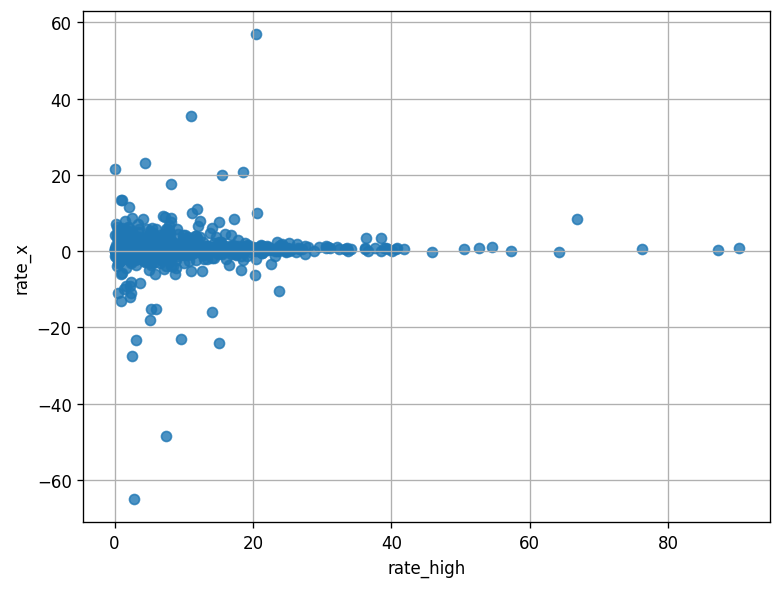

In [22]:
sns.regplot(x=day_data['rate_high'], y=day_data['rate_x'])
plt.grid(True)

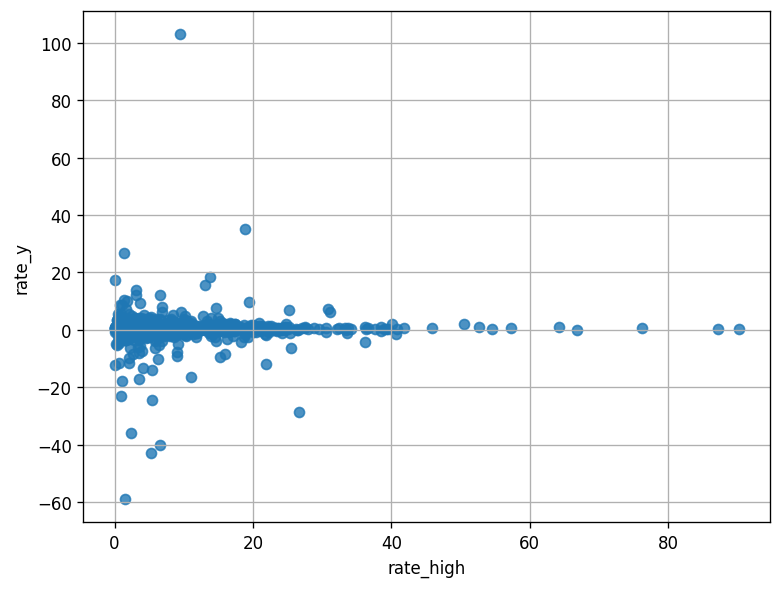

In [23]:
sns.regplot(x=day_data['rate_high'], y=day_data['rate_y'])
plt.grid(True)